In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/CNT 4149')
# setting the working directory
os.getcwd() 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


'/content/drive/My Drive/CNT 4149'

# HW 2


1. Train a neural network to predict the class variable 
2. Display the learning curve (Accuracy vs num of epochs) for 4 values of learning rate (0.0001, 0.001, 0.01 and 0.1)
3. Test your model on the test set and report the accuracy
4. Display the confusion matrix
5. Further optimize the model by changing the number of nodes and layers to obtain the best true positive rate

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

from keras import optimizers
from keras import models
from keras import layers
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [3]:
train = pd.read_csv(r'C:\Users\Tarmah\Desktop\NN_ASSIGNMENT\data\aps_failure_training_set.csv' , skiprows=20)

train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


In [5]:
for col in train.drop(['class'], axis=1).columns:
  
  train[col] = pd.to_numeric(train[col], errors= 'coerce')

train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [6]:
index = train.isna().apply(sum) > 30000

train.columns[index]

Index(['ab_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000',
       'cr_000'],
      dtype='object')

In [7]:
train.drop(['ab_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000',
       'cr_000'], axis=1, inplace = True)


In [8]:
train.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20915 entries, 0 to 59999
Columns: 163 entries, class to eg_000
dtypes: float64(161), int64(1), object(1)
memory usage: 26.2+ MB


In [9]:
list(train.dropna()['class']).count('pos')

183

In [10]:
list(train['class']).count('pos')

1000

In [11]:
list(train['class']).count('neg')

59000

In [12]:
train.shape

(60000, 163)

In [13]:
test = pd.read_csv(r'C:\Users\Tarmah\Desktop\NN_ASSIGNMENT\data\aps_failure_test_set.csv' , skiprows=20)

test.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


In [14]:
for col in test.drop(['class'], axis=1).columns:
  
  test[col] = pd.to_numeric(test[col], errors= 'coerce')

test.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 20.9+ MB


In [16]:
test

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
5,neg,174,NaN,2.600000e+01,24.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
6,neg,40202,NaN,6.400000e+02,606.0,0.0,0.0,0.0,0.0,0.0,...,526218.0,239734.0,439556.0,374248.0,169096.0,53658.0,41054.0,320.0,0.0,0.0
7,neg,120278,NaN,2.130706e+09,256.0,0.0,0.0,0.0,0.0,0.0,...,1006722.0,459658.0,876356.0,689532.0,568540.0,500624.0,1006628.0,34820.0,0.0,0.0
8,neg,14592,0.0,2.130706e+09,162.0,0.0,0.0,0.0,0.0,0.0,...,105024.0,57398.0,49152.0,38256.0,243268.0,145144.0,0.0,0.0,0.0,0.0
9,neg,28338,NaN,2.130706e+09,238.0,0.0,0.0,0.0,0.0,0.0,...,357006.0,150056.0,264776.0,239282.0,140548.0,74750.0,32958.0,84.0,0.0,0.0


In [17]:
test.drop(['ab_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000',
       'cr_000'], axis=1, inplace = True)

In [18]:
test.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5620 entries, 2 to 15997
Columns: 163 entries, class to eg_000
dtypes: float64(161), int64(1), object(1)
memory usage: 7.0+ MB


In [19]:
train1 = train.dropna()

train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20915 entries, 0 to 59999
Columns: 163 entries, class to eg_000
dtypes: float64(161), int64(1), object(1)
memory usage: 26.2+ MB


In [20]:
test1 = test.dropna()

test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5620 entries, 2 to 15997
Columns: 163 entries, class to eg_000
dtypes: float64(161), int64(1), object(1)
memory usage: 7.0+ MB


In [21]:
X_train = train1.drop(['class'], axis=1)

y_train = train1['class']

X_test = test1.drop(['class'], axis=1)

y_test = test1['class']

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20915, 162)
(20915,)
(5620, 162)
(5620,)


In [23]:

x = X_train.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_train = pd.DataFrame(x_scaled)


x = X_test.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_test = pd.DataFrame(x_scaled)

In [24]:
y_train = (pd.get_dummies(y_train)['pos'])

y_test = (pd.get_dummies(y_test)['pos'])


In [26]:
y_test

2        0
3        0
6        0
7        0
11       0
14       0
17       0
20       0
24       0
27       0
34       0
36       0
38       0
40       0
45       0
47       0
49       0
53       0
54       0
58       0
63       0
66       0
69       0
70       0
73       0
84       0
85       0
91       0
92       0
96       0
        ..
15925    0
15926    0
15927    0
15928    0
15935    0
15937    0
15943    0
15945    0
15949    0
15952    0
15954    0
15956    0
15958    0
15963    0
15964    0
15966    0
15968    0
15970    0
15972    0
15973    0
15980    0
15981    0
15983    0
15984    0
15985    0
15987    0
15991    0
15994    1
15995    0
15997    0
Name: pos, Length: 5620, dtype: uint8

In [25]:
y_train

0        0
2        0
4        0
5        0
7        0
10       0
11       0
13       0
16       0
20       0
22       0
24       0
27       0
30       0
33       0
36       0
44       0
46       0
48       0
49       0
52       0
55       0
65       0
66       0
69       0
70       0
73       0
75       0
79       0
80       0
        ..
59933    0
59934    0
59935    0
59936    0
59937    0
59939    0
59948    0
59949    0
59950    0
59951    0
59953    0
59958    0
59960    0
59961    0
59964    0
59969    0
59971    0
59974    0
59975    0
59978    0
59983    0
59984    0
59985    0
59987    0
59989    0
59990    0
59991    0
59995    0
59998    0
59999    0
Name: pos, Length: 20915, dtype: uint8

In [27]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

In [35]:
y_train.shape

(20915, 2)

In [34]:
y_test.shape

(5620, 2)

In [32]:
X_train.shape

(20915, 162)

In [33]:
X_test.shape

(5620, 162)

In [73]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(2, activation='softmax'))
    return model

In [74]:
model = build_model()
rmsprop = optimizers.RMSprop(lr=0.001)
model.compile(optimizer=rmsprop,loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train,y_train, validation_data=(X_test, y_test),epochs=30,batch_size=32)

Train on 20915 samples, validate on 5620 samples
Epoch 1/30
20915/20915 [==============================] - 3s 125us/step - loss: 0.0424 - acc: 0.9909 - val_loss: 0.0398 - val_acc: 0.9932
Epoch 2/30
20915/20915 [==============================] - 2s 87us/step - loss: 0.0234 - acc: 0.9949 - val_loss: 0.0312 - val_acc: 0.9927
Epoch 3/30
20915/20915 [==============================] - 2s 89us/step - loss: 0.0233 - acc: 0.9951 - val_loss: 0.0594 - val_acc: 0.9931
Epoch 4/30
20915/20915 [==============================] - 2s 101us/step - loss: 0.0240 - acc: 0.9952 - val_loss: 0.0305 - val_acc: 0.9956
Epoch 5/30
20915/20915 [==============================] - 2s 80us/step - loss: 0.0219 - acc: 0.9961 - val_loss: 0.0418 - val_acc: 0.9947
Epoch 6/30
20915/20915 [==============================] - 2s 78us/step - loss: 0.0220 - acc: 0.9958 - val_loss: 0.0437 - val_acc: 0.9948
Epoch 7/30
20915/20915 [==============================] - 2s 75us/step - loss: 0.0230 - acc: 0.9958 - val_loss: 0.0321 - val_ac

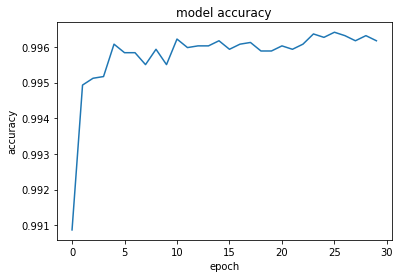

In [75]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

Text(0.5, 0, 'epoch')

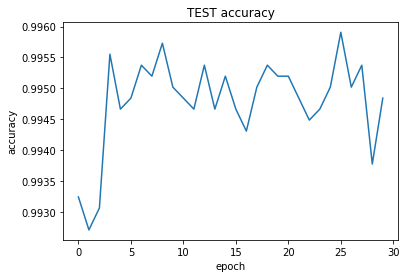

In [76]:
plt.plot(history.history['val_acc'])
plt.title('TEST accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [77]:
predictions = model.predict(X_test)

In [78]:
predictions.shape

(5620, 2)

In [79]:
matrix = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))

In [80]:
print('Confusion Matrix')
print(matrix)

Confusion Matrix
[[5555    3]
 [  26   36]]
